# 12.2 Assignment: Term Project
## Fraudulent Activities in Bank Transactions

In [28]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv('bank_transactions_data.csv')

# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

### Generate Histograms for 5 variables 

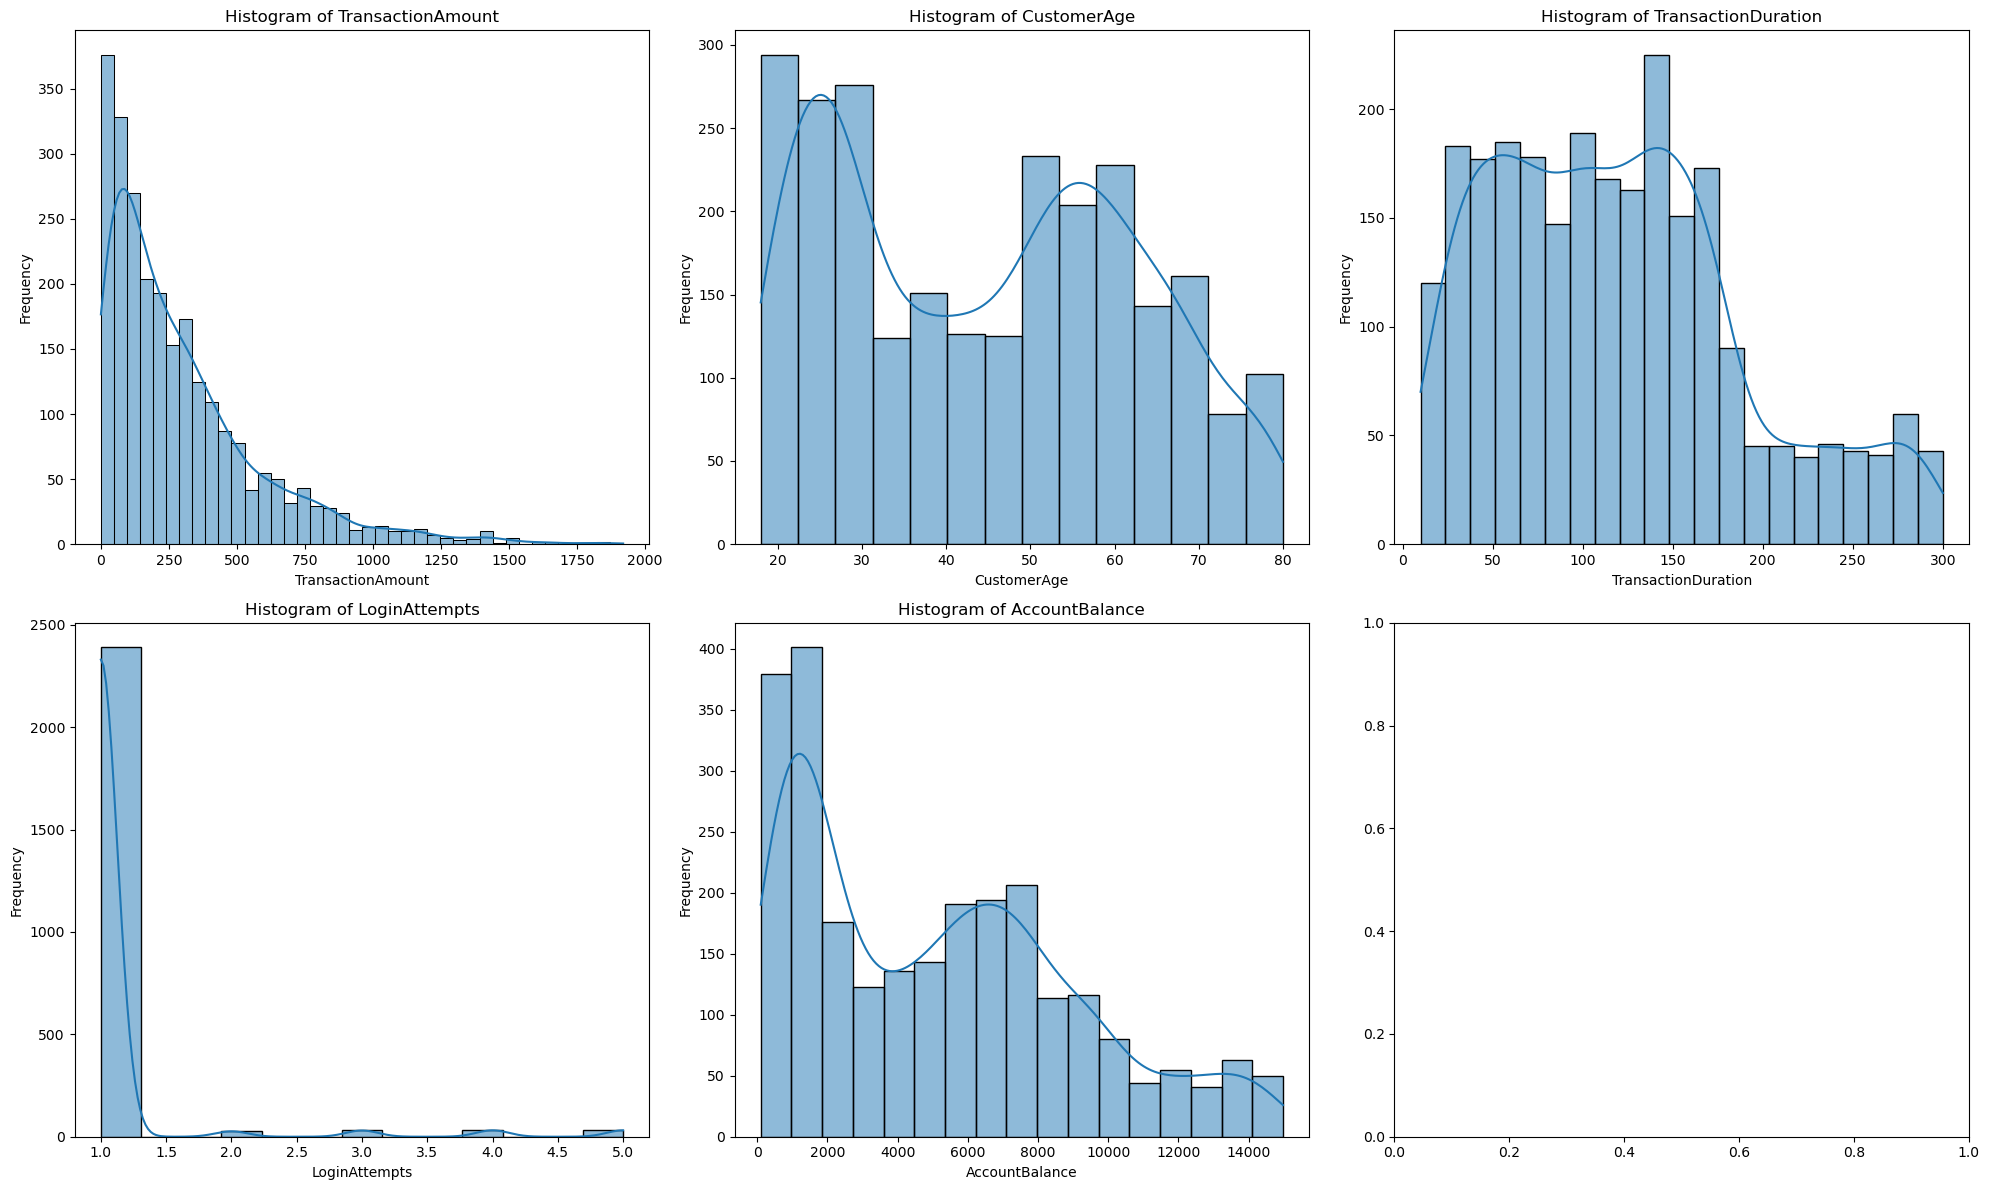

       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  
Mode of TransactionAmount: 11.46
Mode of CustomerAge: 27
Mode of TransactionDuration: 63
M

In [4]:
variables = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.histplot(df[var], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Descriptive statistics
print(df[variables].describe())

# Mode for each variable
for var in variables:
    print(f"Mode of {var}: {df[var].mode().values[0]}")

### Probability Mass Function

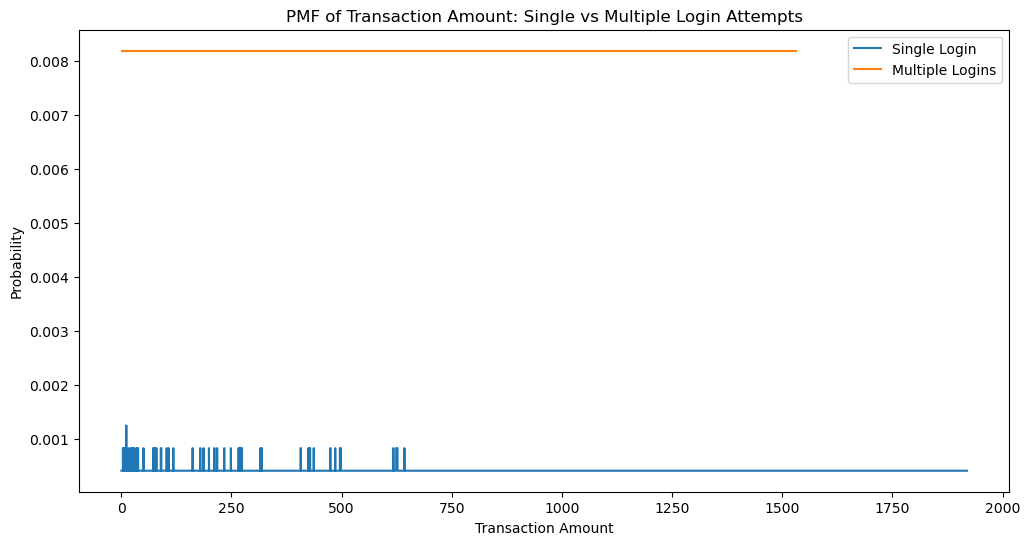

In [6]:
# Define a function to calculate the Probability Mass Function (PMF)
def pmf(x):
    # Convert input to a pandas Series, calculate value counts,
    # sort by index, and normalize by dividing by the total count
    return pd.Series(x).value_counts().sort_index() / len(x)

# Filter the dataframe for transactions with single login attempts
single_login = df[df['LoginAttempts'] == 1]['TransactionAmount']

# Filter the dataframe for transactions with multiple login attempts
multiple_login = df[df['LoginAttempts'] > 1]['TransactionAmount']

# Create a new figure with specified size
plt.figure(figsize=(12, 6))

# Plot step graph for single login transactions
plt.step(pmf(single_login).index, pmf(single_login).values, label='Single Login')

# Plot step graph for multiple login transactions
plt.step(pmf(multiple_login).index, pmf(multiple_login).values, label='Multiple Logins')

# Set x-axis label
plt.xlabel('Transaction Amount')

# Set y-axis label
plt.ylabel('Probability')

# Set the title of the plot
plt.title('PMF of Transaction Amount: Single vs Multiple Login Attempts')

# Add a legend to distinguish between the two plots
plt.legend()

# Display the plot
plt.show()

### Cumulative Distribution Function (CDF)

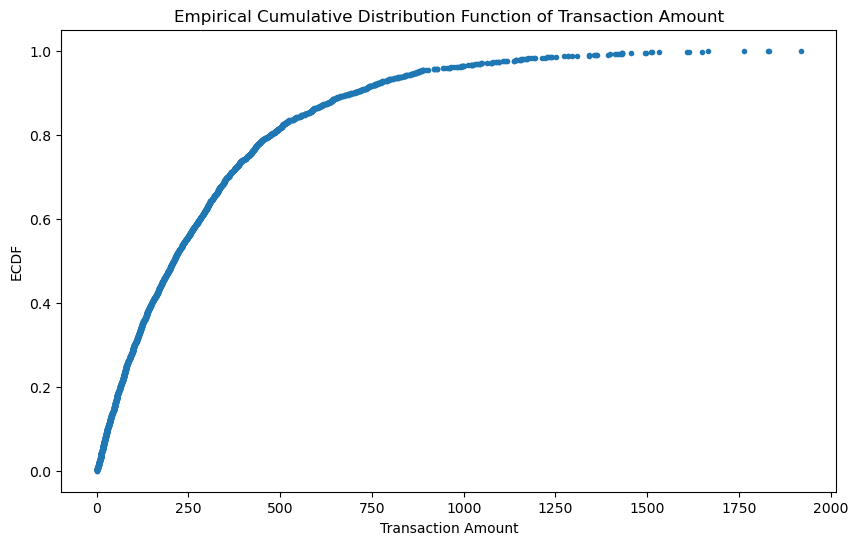

In [8]:
def ecdf(data):
    # Sort the data in ascending order
    x = np.sort(data)
    
    # Calculate the ECDF y-values
    # This creates an array from 1 to len(data), then divides each value by len(data)
    y = np.arange(1, len(data)+1) / len(data)
    
    # Return the x and y values for plotting
    return x, y

# Calculate ECDF for the 'TransactionAmount' column in the dataframe
x, y = ecdf(df['TransactionAmount'])

# Create a new figure with specified size
plt.figure(figsize=(10, 6))

# Plot the ECDF
# marker='.' adds dots at each data point
# linestyle='none' removes the line connecting the dots
plt.plot(x, y, marker='.', linestyle='none')

# Label the x-axis
plt.xlabel('Transaction Amount')

# Label the y-axis
plt.ylabel('ECDF')

# Add a title to the plot
plt.title('Empirical Cumulative Distribution Function of Transaction Amount')

# Display the plot
plt.show()

### Log-normal distribution 

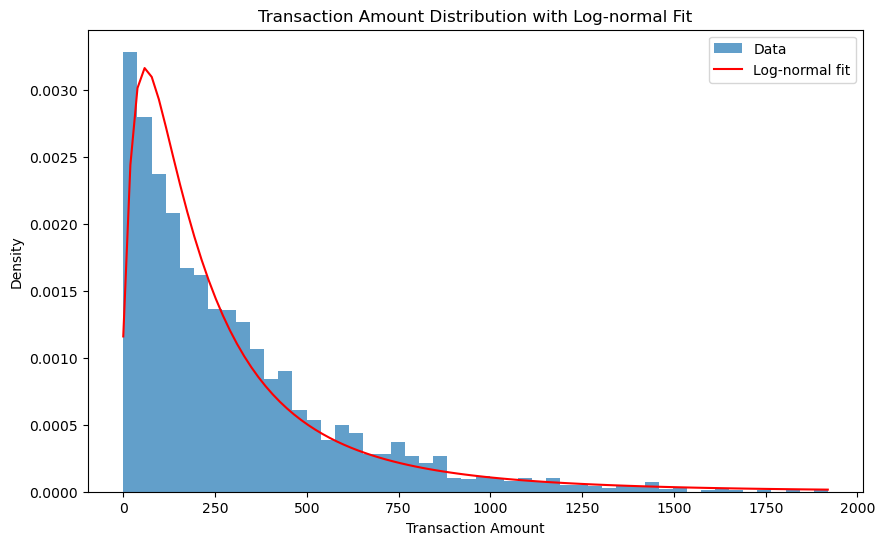

In [10]:
# Import the lognormal distribution from scipy.stats
from scipy.stats import lognorm

# Fit the lognormal distribution to the 'TransactionAmount' column of the dataframe
# This returns the parameters of the distribution
params = lognorm.fit(df['TransactionAmount'])

# Create an array of 100 equally spaced points from 0 to the maximum transaction amount
# This will be used for plotting the fitted distribution
x = np.linspace(0, df['TransactionAmount'].max(), 100)

# Calculate the probability density function (PDF) of the fitted lognormal distribution
# for each point in x
pdf = lognorm.pdf(x, *params)

# Create a new figure with a size of 10x6 inches
plt.figure(figsize=(10, 6))

# Plot a histogram of the actual transaction amounts
# density=True normalizes the histogram so that the area under it integrates to 1
# alpha=0.7 makes the histogram slightly transparent
plt.hist(df['TransactionAmount'], bins=50, density=True, alpha=0.7, label='Data')

# Plot the fitted lognormal distribution as a red line
plt.plot(x, pdf, 'r-', label='Log-normal fit')

# Label the x-axis
plt.xlabel('Transaction Amount')

# Label the y-axis
plt.ylabel('Density')

# Set the title of the plot
plt.title('Transaction Amount Distribution with Log-normal Fit')

# Add a legend to distinguish between the histogram and the fitted line
plt.legend()

# Display the plot
plt.show()

### Scatter plots to compare TransactionAmount with CustomerAge and TransactionDuration.

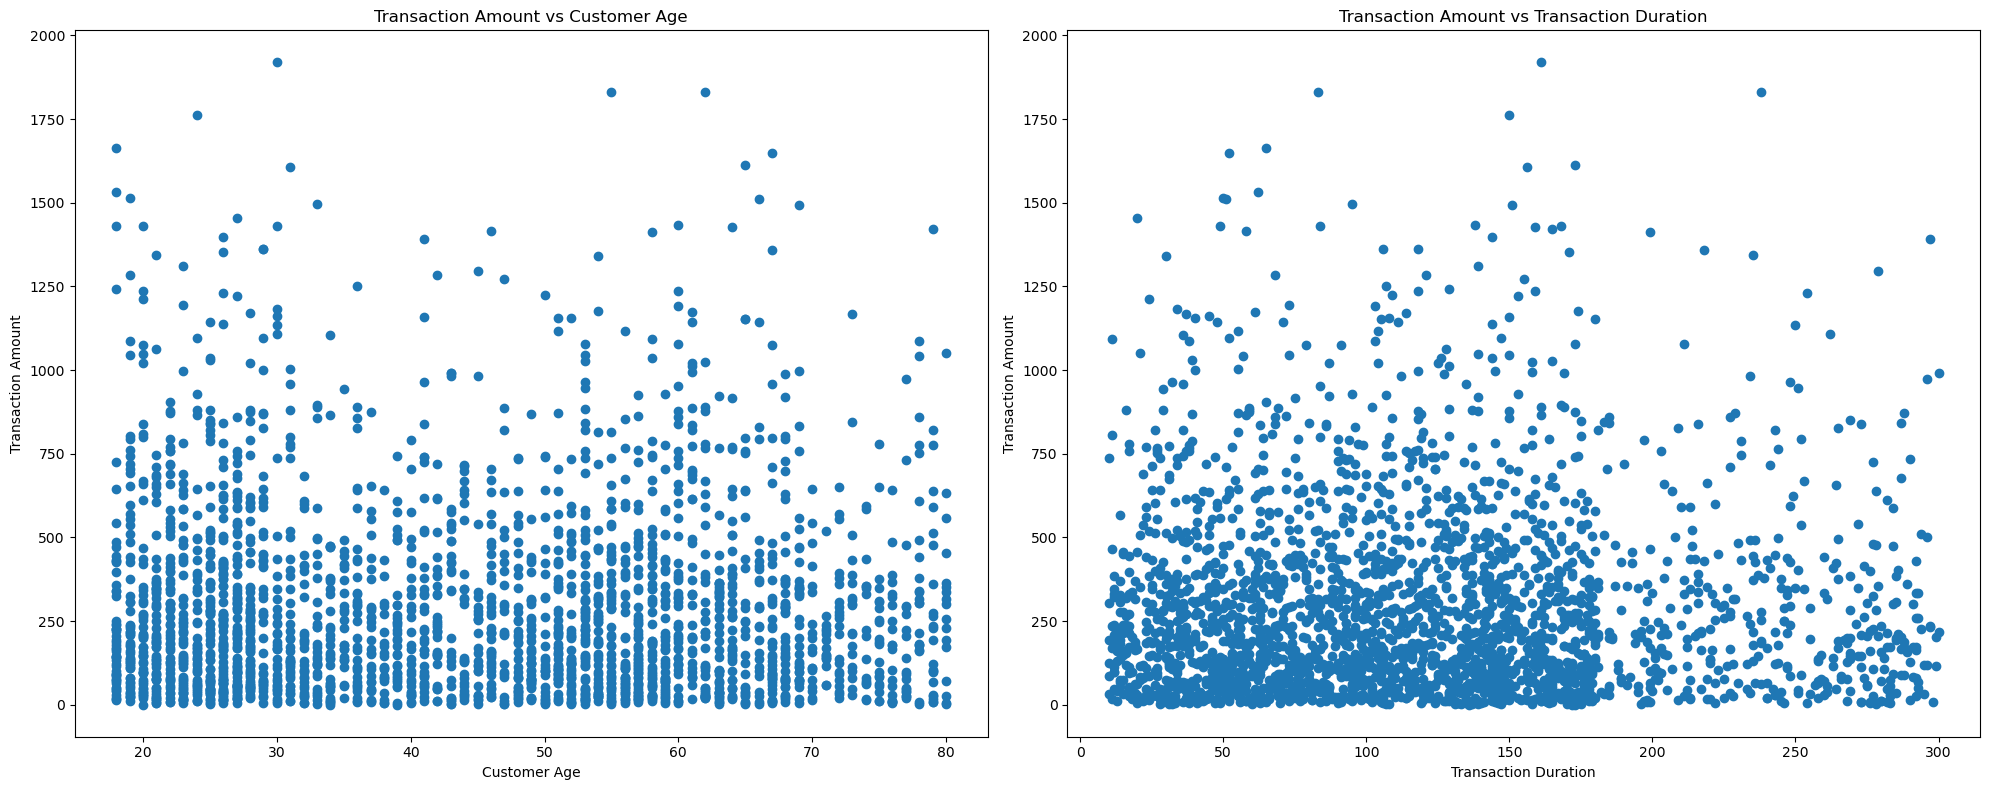

Correlation between Transaction Amount and Customer Age: -0.02561559722344011
Correlation between Transaction Amount and Transaction Duration: 0.0043592922440120726


In [12]:
# Create a figure with two subplots side by side, with a total size of 20x8 inches
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# First subplot: Transaction Amount vs Customer Age
ax1.scatter(df['CustomerAge'], df['TransactionAmount'])
ax1.set_xlabel('Customer Age')
ax1.set_ylabel('Transaction Amount')
ax1.set_title('Transaction Amount vs Customer Age')

# Second subplot: Transaction Amount vs Transaction Duration
ax2.scatter(df['TransactionDuration'], df['TransactionAmount'])
ax2.set_xlabel('Transaction Duration')
ax2.set_ylabel('Transaction Amount')
ax2.set_title('Transaction Amount vs Transaction Duration')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

# Calculate and print correlations
# Correlation between Transaction Amount and Customer Age
print("Correlation between Transaction Amount and Customer Age:", 
      df['TransactionAmount'].corr(df['CustomerAge']))

# Correlation between Transaction Amount and Transaction Duration
print("Correlation between Transaction Amount and Transaction Duration:", 
      df['TransactionAmount'].corr(df['TransactionDuration']))

### Hypothesis testing 

In [14]:
# Filter the dataframe to get transaction amounts for single login attempts
single_login = df[df['LoginAttempts'] == 1]['TransactionAmount']

# Filter the dataframe to get transaction amounts for multiple login attempts
multiple_login = df[df['LoginAttempts'] > 1]['TransactionAmount']

# Perform independent t-test comparing transaction amounts between single and multiple login attempts
# t_stat is the t-statistic, p_value is the probability value
t_stat, p_value = stats.ttest_ind(single_login, multiple_login)

# Print the results of the t-test
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 0.3291652653750849
P-value: 0.742058238396859


### Multiple linear regression to predict TransactionAmount based on CustomerAge, TransactionDuration, and LoginAttempts.

In [16]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare the feature matrix X and target variable y
X = df[['CustomerAge', 'TransactionDuration', 'LoginAttempts']]  # Select features
y = df['TransactionAmount']  # Select target variable

# Split the data into training and testing sets
# 80% for training, 20% for testing, with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Print the regression coefficients for each feature
print("Regression coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

# Print the intercept of the model
print(f"Intercept: {model.intercept_}")

# Calculate and print the R-squared score on the test set
# This indicates how well the model fits the data
print(f"R-squared: {model.score(X_test, y_test)}")

Regression coefficients:
CustomerAge: -0.59928188318481
TransactionDuration: 0.047279997940326585
LoginAttempts: -7.753399776842646
Intercept: 323.33522031525723
R-squared: -0.008591205053039674


This analysis provides insights into the relationships between various transaction characteristics and can be used to identify potential indicators of fraudulent activities. Further refinement and more advanced techniques could be applied to improve fraud detection based on these initial findings.
